In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import xgboost as xgb
from pyearth import Earth
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer

In [38]:
# Import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
greeks = pd.read_csv('greeks.csv')

In [39]:
# Change to dummy variables
train['EJ'] = train['EJ'].apply(lambda x: 0 if x == 'A' else 1)
test['EJ'] = test['EJ'].apply(lambda x: 0 if x == 'A' else 1)

#Separating train data for predictors and response
X_train = train.drop('Class', axis = 1)
y_train = train.loc[:, 'Class']

#Dropping id column
X_train = X_train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

#Creating validation data set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, stratify = y_train)

#Scaling the train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test)
#X_val_scaled = scaler.transform(X_val)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)
#X_val = pd.DataFrame(X_val_scaled)

In [78]:
#SKIP!!!
#Using for loop to iterate over potential values of n_neighbors for imputing missing values, using a 
#CatBoostRegressor() to get train MSE as the parameter to choose best value
scores = []
val_scores = []
for i in range(1, 40):
    imputer = KNNImputer(n_neighbors = i)
    X_train_imputed = imputer.fit_transform(X_train)
    model_test = CatBoostClassifier(verbose = False)
    model_test.fit(X_train_imputed, y_train)

    true_labels = np.array(y_train)
    predicted_probs = np.array(model_test.predict_proba(X_train_imputed))

    class_weights = np.mean(true_labels) / np.bincount(true_labels)
    logloss_per_class = log_loss(true_labels, predicted_probs, labels=[0, 1], normalize=False)
    balanced_logloss = np.sum(logloss_per_class * class_weights)
    scores.append(balanced_logloss)
    true_labels = np.array(y_val)
    predicted_probs = np.array(model_test.predict_proba(X_val))

    class_weights = np.mean(true_labels) / np.bincount(true_labels)
    logloss_per_class = log_loss(true_labels, predicted_probs, labels=[0, 1], normalize=False)
    balanced_logloss = np.sum(logloss_per_class * class_weights)
    
    val_scores.append(balanced_logloss)

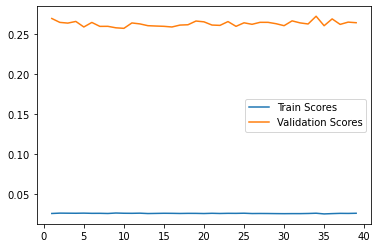

In [79]:
x = range(1, len(scores) + 1)
plt.plot(x, scores, label = 'Train Scores')
plt.plot(x, val_scores, label = 'Validation Scores')
plt.legend()

In [40]:
imputer = KNNImputer(n_neighbors = 10)
X_train_imputed = imputer.fit_transform(X_train)
#X_val_imputed = imputer.transform(X_val)
X_train = pd.DataFrame(X_train_imputed)
#X_val = pd.DataFrame(X_val_imputed)

In [5]:
# Initial data analysis
#print(train.isnull().sum())

In [93]:
# With all performance
model = RandomForestClassifier()
model.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, model)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.08264023663397657 for train data and 0.9237965382605047 for validation data.


In [94]:
# With 50 variables performance
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=50)
rfe.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, rfe)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.08294645924201895 for train data and 0.3432603163684188 for validation data.


In [95]:
# With 40 variables performance
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=40)
rfe.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, rfe)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.08005792163385073 for train data and 0.32501721659281196 for validation data.


In [99]:
# With 30 variables performance
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=30)
rfe.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, rfe)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.07577995942699271 for train data and 0.32218710570319986 for validation data.


In [97]:
# With 20 variables performance
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, rfe)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.07242304973221542 for train data and 0.9020813926608242 for validation data.


In [98]:
# With 10 variables performance
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
results = balanced_log_loss(X_train, y_train, X_val, y_val, rfe)
print(f'The results are {results[0]} for train data and {results[1]} for validation data.')

The results are 0.07508378540226826 for train data and 0.8997287742485649 for validation data.


In [48]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert to dictionary format
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [31]:
from sklearn.metrics import log_loss
def balanced_log_loss(y_true, y_pred):
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1/nc[y_true], eps=1e-15)
balanced_log_loss_scorer = make_scorer(balanced_log_loss, greater_is_better=False)

In [61]:
start_time = time.time()
param_grid = {'max_depth': [4, 5, 6],
              'learning_rate': [0.0075, 0.01, 0.0125],
                'n_estimators': [750, 1000, 1250],
                'subsample': [0.75, 0.8, 0.85],
             'reg_lambda': [5, 7.5, 10],
             'colsample_bylevel': [0.75, 0.8, 0.85]}

cv = KFold(n_splits = 5,shuffle = True, random_state = 1)
optimal_params = RandomizedSearchCV(estimator = CatBoostClassifier(random_state = 1, verbose = False),                                                       
                             param_distributions = param_grid, n_iter = 200,
                             verbose = 1,random_state = 1,
                             n_jobs = -1,
                             cv = cv, scoring = balanced_log_loss_scorer)
optimal_params.fit(X_train, y_train, early_stopping_rounds = 10)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation log loss = ", -optimal_params.best_score_)
print("Time taken = ", round((time.time() - start_time)/60), " minutes")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Optimal parameter values = {'subsample': 0.8, 'reg_lambda': 5, 'n_estimators': 1250, 'max_depth': 4, 'learning_rate': 0.0125, 'colsample_bylevel': 0.75}
Optimal cross validation log loss =  5.271507047012188
Time taken =  19  minutes


In [63]:
catboost = CatBoostClassifier(subsample = 0.8, reg_lambda = 5, n_estimators = 1250, max_depth = 4, learning_rate = 0.0125, colsample_bylevel = 0.75).fit(X_train, y_train)

0:	learn: 0.6839857	total: 3.68ms	remaining: 4.59s
1:	learn: 0.6725438	total: 8ms	remaining: 4.99s
2:	learn: 0.6602602	total: 10.9ms	remaining: 4.52s
3:	learn: 0.6516572	total: 13.9ms	remaining: 4.34s
4:	learn: 0.6408717	total: 16.6ms	remaining: 4.14s
5:	learn: 0.6307869	total: 19.5ms	remaining: 4.04s
6:	learn: 0.6227655	total: 21.6ms	remaining: 3.83s
7:	learn: 0.6151075	total: 23.3ms	remaining: 3.62s
8:	learn: 0.6051038	total: 25.5ms	remaining: 3.52s
9:	learn: 0.5970534	total: 27.2ms	remaining: 3.38s
10:	learn: 0.5897080	total: 29.3ms	remaining: 3.3s
11:	learn: 0.5812558	total: 31.2ms	remaining: 3.22s
12:	learn: 0.5731046	total: 33ms	remaining: 3.13s
13:	learn: 0.5635657	total: 34.8ms	remaining: 3.07s
14:	learn: 0.5556979	total: 37.1ms	remaining: 3.06s
15:	learn: 0.5475494	total: 38.9ms	remaining: 3s
16:	learn: 0.5373074	total: 40.6ms	remaining: 2.94s
17:	learn: 0.5287181	total: 42.6ms	remaining: 2.91s
18:	learn: 0.5197891	total: 44.8ms	remaining: 2.9s
19:	learn: 0.5134092	total: 46.7

274:	learn: 0.1482335	total: 384ms	remaining: 1.36s
275:	learn: 0.1478704	total: 386ms	remaining: 1.36s
276:	learn: 0.1473528	total: 387ms	remaining: 1.36s
277:	learn: 0.1470604	total: 388ms	remaining: 1.36s
278:	learn: 0.1467701	total: 390ms	remaining: 1.35s
279:	learn: 0.1464317	total: 391ms	remaining: 1.35s
280:	learn: 0.1461296	total: 393ms	remaining: 1.36s
281:	learn: 0.1456919	total: 395ms	remaining: 1.35s
282:	learn: 0.1454125	total: 396ms	remaining: 1.35s
283:	learn: 0.1448353	total: 398ms	remaining: 1.35s
284:	learn: 0.1443923	total: 399ms	remaining: 1.35s
285:	learn: 0.1440560	total: 400ms	remaining: 1.35s
286:	learn: 0.1437655	total: 402ms	remaining: 1.35s
287:	learn: 0.1435886	total: 403ms	remaining: 1.34s
288:	learn: 0.1433829	total: 404ms	remaining: 1.34s
289:	learn: 0.1430310	total: 405ms	remaining: 1.34s
290:	learn: 0.1428767	total: 407ms	remaining: 1.34s
291:	learn: 0.1424196	total: 408ms	remaining: 1.34s
292:	learn: 0.1419495	total: 409ms	remaining: 1.33s
293:	learn: 

574:	learn: 0.0736881	total: 769ms	remaining: 903ms
575:	learn: 0.0735555	total: 771ms	remaining: 902ms
576:	learn: 0.0732145	total: 772ms	remaining: 900ms
577:	learn: 0.0729730	total: 774ms	remaining: 900ms
578:	learn: 0.0728592	total: 776ms	remaining: 899ms
579:	learn: 0.0728053	total: 777ms	remaining: 898ms
580:	learn: 0.0726726	total: 779ms	remaining: 897ms
581:	learn: 0.0725472	total: 780ms	remaining: 895ms
582:	learn: 0.0723588	total: 781ms	remaining: 893ms
583:	learn: 0.0722039	total: 782ms	remaining: 892ms
584:	learn: 0.0720713	total: 783ms	remaining: 890ms
585:	learn: 0.0718574	total: 785ms	remaining: 889ms
586:	learn: 0.0717063	total: 786ms	remaining: 887ms
587:	learn: 0.0715317	total: 787ms	remaining: 886ms
588:	learn: 0.0714525	total: 788ms	remaining: 884ms
589:	learn: 0.0713796	total: 789ms	remaining: 883ms
590:	learn: 0.0713009	total: 790ms	remaining: 881ms
591:	learn: 0.0710415	total: 791ms	remaining: 880ms
592:	learn: 0.0709699	total: 793ms	remaining: 878ms
593:	learn: 

856:	learn: 0.0423373	total: 1.15s	remaining: 529ms
857:	learn: 0.0423120	total: 1.16s	remaining: 528ms
858:	learn: 0.0422538	total: 1.16s	remaining: 527ms
859:	learn: 0.0421221	total: 1.16s	remaining: 526ms
860:	learn: 0.0420803	total: 1.16s	remaining: 524ms
861:	learn: 0.0419258	total: 1.16s	remaining: 523ms
862:	learn: 0.0417954	total: 1.16s	remaining: 522ms
863:	learn: 0.0417439	total: 1.17s	remaining: 521ms
864:	learn: 0.0416242	total: 1.17s	remaining: 519ms
865:	learn: 0.0414985	total: 1.17s	remaining: 518ms
866:	learn: 0.0414319	total: 1.17s	remaining: 517ms
867:	learn: 0.0414109	total: 1.17s	remaining: 515ms
868:	learn: 0.0412726	total: 1.17s	remaining: 514ms
869:	learn: 0.0412387	total: 1.17s	remaining: 513ms
870:	learn: 0.0411868	total: 1.17s	remaining: 511ms
871:	learn: 0.0410934	total: 1.18s	remaining: 510ms
872:	learn: 0.0410617	total: 1.18s	remaining: 508ms
873:	learn: 0.0409139	total: 1.18s	remaining: 507ms
874:	learn: 0.0408689	total: 1.18s	remaining: 506ms
875:	learn: 

1144:	learn: 0.0257775	total: 1.54s	remaining: 141ms
1145:	learn: 0.0257400	total: 1.54s	remaining: 140ms
1146:	learn: 0.0257145	total: 1.54s	remaining: 138ms
1147:	learn: 0.0256869	total: 1.54s	remaining: 137ms
1148:	learn: 0.0256782	total: 1.54s	remaining: 136ms
1149:	learn: 0.0256367	total: 1.54s	remaining: 134ms
1150:	learn: 0.0255725	total: 1.54s	remaining: 133ms
1151:	learn: 0.0255161	total: 1.55s	remaining: 132ms
1152:	learn: 0.0254547	total: 1.55s	remaining: 130ms
1153:	learn: 0.0254193	total: 1.55s	remaining: 129ms
1154:	learn: 0.0253748	total: 1.55s	remaining: 128ms
1155:	learn: 0.0253345	total: 1.55s	remaining: 126ms
1156:	learn: 0.0252750	total: 1.55s	remaining: 125ms
1157:	learn: 0.0252416	total: 1.55s	remaining: 124ms
1158:	learn: 0.0252048	total: 1.56s	remaining: 122ms
1159:	learn: 0.0251757	total: 1.56s	remaining: 121ms
1160:	learn: 0.0251521	total: 1.56s	remaining: 119ms
1161:	learn: 0.0251040	total: 1.56s	remaining: 118ms
1162:	learn: 0.0250424	total: 1.56s	remaining:

In [59]:
start_time = time.time()
param_grid = {'max_depth': [4, 6, 8],
              'num_leaves': [20, 31, 40],
              'learning_rate': [0.01, 0.05, 0.1],
               'reg_lambda':[0, 10, 100],
                'n_estimators':[100, 500, 1000],
                'reg_alpha': [0, 10, 100],
                'subsample': [0.5, 0.75, 1.0],
                'colsample_bytree': [0.5, 0.75, 1.0]}

cv = KFold(n_splits=5, shuffle=True, random_state=1)
optimal_params_2 = RandomizedSearchCV(estimator=LGBMClassifier(random_state=1),                                                       
                             param_distributions = param_grid, n_iter = 200,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv, scoring = balanced_log_loss_scorer)
optimal_params_2.fit(X_train, y_train)
print("Optimal parameter values =", optimal_params_2.best_params_)
print("Optimal cross validation log loss = ", -optimal_params.best_score_)
print("Time taken = ", round((time.time()-start_time)/60), " minutes")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


NotFittedError: All estimators failed to fit

In [54]:
params = {'n_estimators': [500],
          'max_features': list(range(7, 12)),
          'max_depth': [14, 15, 16],
          'min_samples_split': [1, 2, 3],
          'min_samples_leaf': [1, 2, 3],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestClassifier(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring=balanced_log_loss_scorer)
rf_regressor_grid.fit(X_train, y_train)
print('Best Parameters: ', rf_regressor_grid.best_params_)
print('Best Score: ', -rf_regressor_grid.best_score_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters:  {'bootstrap': False, 'max_depth': 14, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Best Score:  4.776333884808826


In [64]:
rf = RandomForestClassifier(bootstrap = False, max_depth = 14, max_features = 9, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 500).fit(X_train, y_train)

In [55]:
params = {
    'n_estimators': [400],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

bagging_regressor_grid = GridSearchCV(
    BaggingClassifier(),
    param_grid = params,
    cv = cv,
    scoring = balanced_log_loss_scorer,
    n_jobs = -1,
    verbose = 1
)

bagging_regressor_grid.fit(X_train, y_train)
print('Best Parameters: ', bagging_regressor_grid.best_params_)
print('Best Score: ', -bagging_regressor_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:  {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 400}
Best Score:  4.701327345156574


In [66]:
dt = BaggingClassifier(bootstrap = False, bootstrap_features = False, max_features = 1, max_samples = 0.5, n_estimators = 400).fit(X_train, y_train)

In [56]:
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [10, 50, 100,200,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                          DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                          verbose = True, scoring = balanced_log_loss_scorer)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best: 4.973697 using {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 500}


In [68]:
adaboost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1, base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(X_train, y_train)

In [83]:
#Tuning the random forest parameters
start_time = time.time()

#Using random forests as the meta model (final_estimator). Note that random forest will require tuning
ensemble_model = StackingClassifier(estimators=[('ada',adaboost),('rf',rf),('dt',dt),('catboost',catboost)],
                                   final_estimator=RandomForestClassifier(n_estimators=500, max_features = 1,
                                                                          random_state=1,oob_score=True),n_jobs=-1)

end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")

time taken =  0.8740434686342875  minutes


In [84]:
scores.mean()

-4.614318693333919